In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the Dataset

In [12]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [28]:
plt.style.use('dark_background')

Data Cleaning and Preparation

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
data = data.drop(columns=['Cabin'])

In [15]:
data = data.dropna()

# Statistical Analysis

In [16]:
description = data.describe()
print(description)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169   29.642093    0.514045   
std     258.683191    0.491139    0.836854   14.492933    0.930692   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.750000    0.000000    1.000000   20.000000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.250000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  712.000000  712.000000  
mean     0.432584   34.567251  
std      0.854181   52.938648  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.645850  
75%      1.000000   33.000000  
max      6.000000  512.329200  


In [18]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029526 -0.035609  0.033681 -0.082704 -0.011672   
Survived        0.029526  1.000000 -0.356462 -0.082446 -0.015523  0.095265   
Pclass         -0.035609 -0.356462  1.000000 -0.365902  0.065187  0.023666   
Age             0.033681 -0.082446 -0.365902  1.000000 -0.307351 -0.187896   
SibSp          -0.082704 -0.015523  0.065187 -0.307351  1.000000  0.383338   
Parch          -0.011672  0.095265  0.023666 -0.187896  0.383338  1.000000   
Fare            0.009655  0.266100 -0.552893  0.093143  0.139860  0.206624   

                 Fare  
PassengerId  0.009655  
Survived     0.266100  
Pclass      -0.552893  
Age          0.093143  
SibSp        0.139860  
Parch        0.206624  
Fare         1.000000  


# Create Graphs

Relational Graph (Scatter Plot)

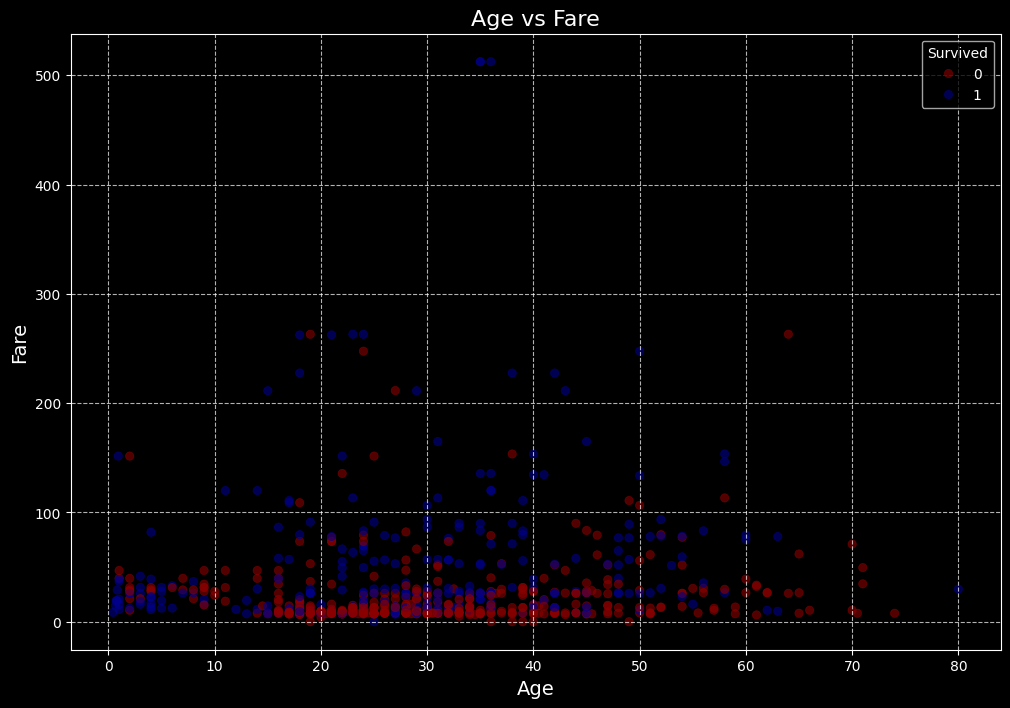

In [29]:
def create_scatter_plot(data):
    """
    Creates and displays a scatter plot for Age vs Fare with enhanced aesthetics.

    Parameters:
    data (DataFrame): The input DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived', palette=['darkred', 'darkblue'], alpha=0.6, edgecolor=None)
    plt.title('Age vs Fare', fontsize=16, color='white')
    plt.xlabel('Age', fontsize=14, color='white')
    plt.ylabel('Fare', fontsize=14, color='white')
    plt.legend(title='Survived', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

create_scatter_plot(data)


Categorical Graph (Bar Chart)

<ipython-input-30-10dc060d2b19>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette=['darkred', 'darkblue', 'darkgreen'])


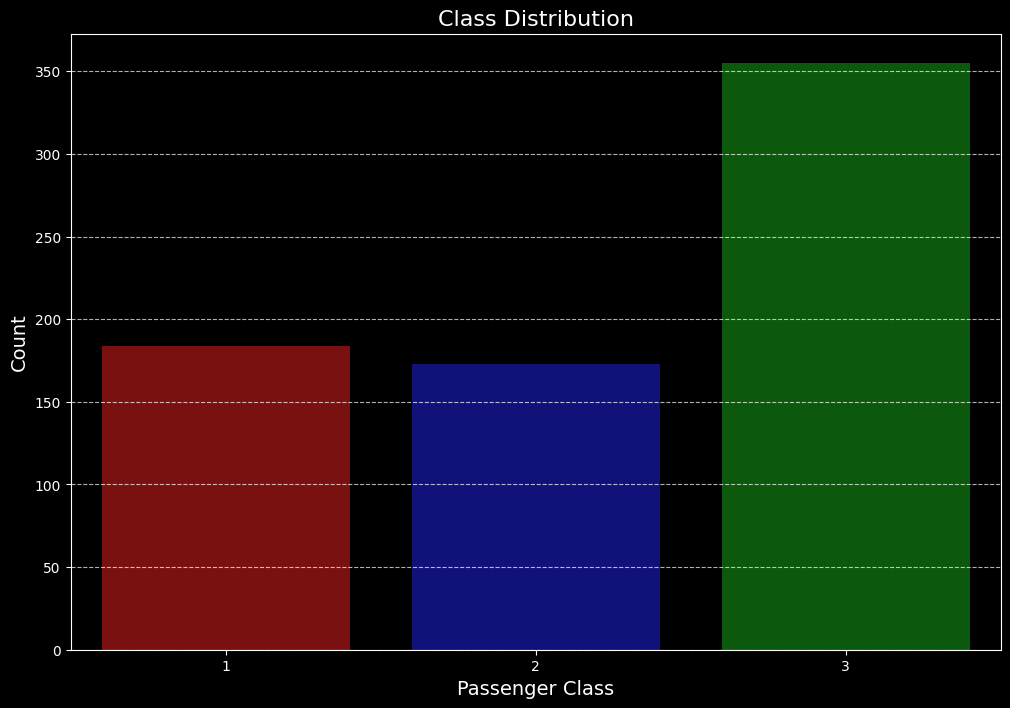

In [30]:
def create_bar_chart(data):
    """
    Creates and displays a bar chart for the distribution of passenger classes with enhanced aesthetics.

    Parameters:
    data (DataFrame): The input DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Pclass', data=data, palette=['darkred', 'darkblue', 'darkgreen'])
    plt.title('Class Distribution', fontsize=16, color='white')
    plt.xlabel('Passenger Class', fontsize=14, color='white')
    plt.ylabel('Count', fontsize=14, color='white')
    plt.xticks(rotation=0, color='white')
    plt.yticks(color='white')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

create_bar_chart(data)


Statistical Graph (Heatmap)

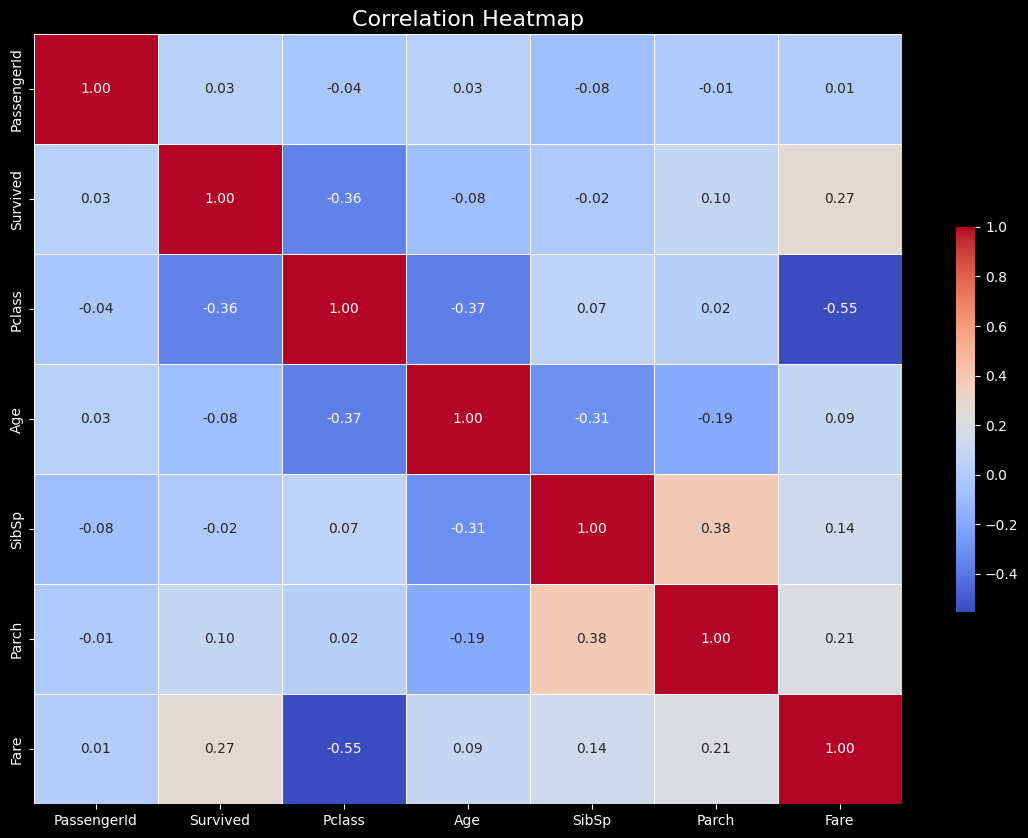

In [32]:
def create_heatmap(data):
    """
    Creates and displays a heatmap for the correlation matrix of the dataset with enhanced aesthetics.

    Parameters:
    data (DataFrame): The input DataFrame containing the dataset.

    Returns:
    None
    """
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'shrink': 0.5})
    plt.title('Correlation Heatmap', fontsize=16, color='white')
    plt.show()

create_heatmap(data)